# Distributions

:label:`sec_distributions`


Now that we have learned about how to work with probability theory in both discrete and continuous setting, lets get to know some of the common random distributions encountered.  Depending on the area of machine learning we are working in, we may potentially need to be familiar with vastly more of these, or for some areas of deep learning potentially none at all.  This is, however, a good basic list to be familiar with.

In [1]:
%matplotlib inline
import d2l
from IPython import display
from mxnet import np, npx
npx.set_np()

## Bernoulli

This is the simplest random variable usually encountered.  This is the random variable that encodes a coin flip which comes up $1$ with probability $p$ and $0$ with probability $1-p$.  If we have a random variable with this distribution, we will write

$$
X \sim \mathrm{Bernoulli}(p).
$$

The cumulative distribution function is 

$$
F(x) = \begin{cases}
0 & x < 0, \\
1-p & 0 \le x < 1, \\
1 & x >= 1 .
\end{cases}
$$

Let us plot the probability mass function and cumulative distribution function.

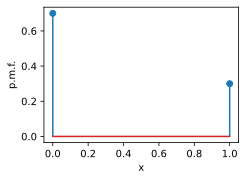

In [2]:
p = 0.3

d2l.set_figsize()
d2l.plt.stem([0,1],[1-p,p], use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

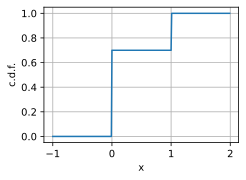

In [3]:
x = np.arange(-1,2,0.01)
F = lambda x: 0 if x < 0 else 1 if x > 1 else 1-p

d2l.plot(x,np.array([F(y) for y in x]),'x','c.d.f.')

If $X \sim \mathrm{Bernoulli}(p)$, then:

* $\mu_X = p$,
* $\sigma_X^2 = p(1-p)$.

We can sample an array of arbitrary shape from a Bernoulli random variable in numpy as follows.

```
1*(np.random.rand(10,10) < p)
```


## Discrete Uniform

The next random variable encountered is a discrete uniform distribution.  For our discussion here, we will assume that it is on the integers $\{1,2,\ldots, n\}$, however any other set of values can be freely chosen.  The meaning of the word *uniform* in this context is that every possible value is equally likely.  The probability for each value $i \in \{1,2,3,\ldots,n\}$ is $p_i = \frac{1}{n}$.  We will denote this relationship as

$$
X \sim \mathrm{Uniform}(n).
$$

The cumulative distribution function is 

$$
F(x) = \begin{cases}
0 & x < 1, \\
\frac{k}{n} & k \le x < k+1 \text{ with } 1 \le k < n, \\
1 & x >= n .
\end{cases}
$$

Let us plot the probability mass function and cumulative distribution function.

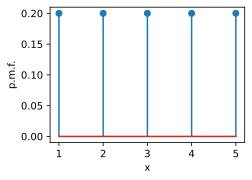

In [4]:
n = 5

d2l.plt.stem([i+1 for i in range(n)],n*[1/n], use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

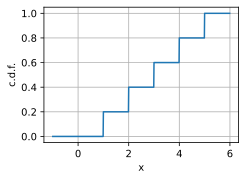

In [5]:
x = np.arange(-1,6,0.01)
F = lambda x: 0 if x < 1 else 1 if x > n else np.floor(x)/n

d2l.plot(x,np.array([F(y) for y in x]),'x','c.d.f.')

If $X \sim \mathrm{Uniform}(n)$, then:

* $\mu_X = \frac{1+n}{2}$,
* $\sigma_X^2 = \frac{n^2-1}{12}$.

We can an array of arbitrary shape from a discrete uniform random variable in numpy as follows.  Note that the range

```
np.random.random_integers(1, n, size=(10,10))
```


## Continuous Uniform

Next let us discuss the continuous uniform distribution. The idea behind this random variable is that if we increase the $n$ in the previous distribution, and then scale it to fit within the interval $[a,b]$, we will approach a continuous random variable that just picks an arbitrary value in $[a,b]$ all with equal probability.  We will denote this distribution as

$$
X \sim \mathrm{Uniform}([a,b]).
$$

The probability density function is 

$$
p(x) = \begin{cases}
\frac{1}{b-a} & x \in [a,b], \\
0 & x \not\in [a,b].
\end{cases}
$$

The cumulative distribution function is 

$$
F(x) = \begin{cases}
0 & x < a, \\
\frac{x-a}{b-a} & x \in [a,b], \\
1 & x >= b .
\end{cases}
$$

Let us plot the probability density function and cumulative distribution function.

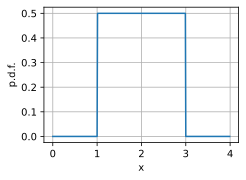

In [6]:
a = 1; b = 3

x = np.arange(0, 4, 0.01)
p = (x > a)*(x < b)/(b - a)

d2l.plot(x, p, 'x', 'p.d.f.')

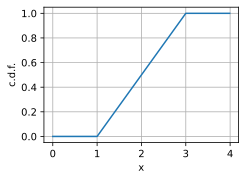

In [7]:
F = lambda x: 0 if x < a else 1 if x > b else (x-a)/(b-a)

d2l.plot(x, np.array([F(y) for y in x]), 'x', 'c.d.f.')

If $X \sim \mathrm{Uniform}([a,b])$, then:

* $\mu_X = \frac{a+b}{2}$,
* $\sigma_X^2 = \frac{(b-a)^2}{12}$.

We can an array of arbitrary shape from a uniform random variable in numpy as follows.  Note that it by default samples from a $\mathrm{Uniform}([a,b])$, so if we want a different range we need to scale it.

```
(b - a) * np.random.rand(10, 10) + a
```


## Binomial

Let us make things a little more complex and examine the *binomial* random variable.  This random variable originates from performing a sequence of $n$ independent experiments, each of which have probability $p$ of succeeding, and asking how many successes we expect to see.

Let us express this mathematically.  Each experiment is an independent random variable $X_i$ where we will use $1$ to encode success, and $0$ to encode failure.  Since each is an independent coin flip which is successful with probability $p$, we can say that $X_i \sim \mathrm{Bernoulli}(p)$.  Then, the binomial random variable is

$$
X = \sum_{i=1}^n X_i.
$$

In this case, we will write

$$
X \sim \mathrm{Binomial}(n,p).
$$

To get the cumulative distribution function, we need to notice that getting exactly $k$ successes can occur in $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ ways each of which has a probability of $p^m(1-p)^{n-m}$ of occuring.  Thus the cumulative distribution function is

$$
F(x) = \begin{cases}
0 & x < 0, \\
\sum_{m \le k} \binom{n}{m} p^m(1-p)^{n-m}  & k \le x < k+1 \text{ with } 0 \le k < n, \\
1 & x >= n .
\end{cases}
$$

Let us plot the probability density function and cumulative distribution function.

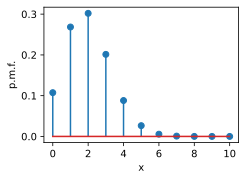

In [8]:
n = 10
p = 0.2

# Compute Binomial Coefficient
def binom(n, k):
    comb = 1
    for i in range(min(k, n - k)):
        comb = comb * (n - i) // (i + 1)
    return comb

pmf = np.array([p**i*(1-p)**(n-i)*binom(n,i) for i in range(n+1)])

d2l.plt.stem([i for i in range(n+1)],pmf, use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

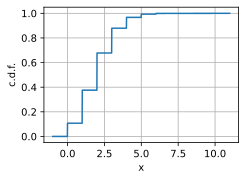

In [9]:
x = np.arange(-1, 11, 0.01)
cmf = np.cumsum(pmf)
F = lambda x: 0 if x < 0 else 1 if x > n else cmf[int(x)]

d2l.plot(x, np.array([F(y) for y in x.tolist()]), 'x', 'c.d.f.')

While this result is not simple, the means and variances are.  If $X \sim \mathrm{Binomial}(n,p)$, then:

* $\mu_X = np$,
* $\sigma_X^2 = np(1-p)$.

This can be sampled in numpy as follows.

```
np.random.binomial(n, p, size = (10,10))
```


## Poisson
Let us now perform a thought experiment.  Let us say we are standing at a bus stop and we want to know how many buses will arrive in the next minute.  Lets start by considering $X^{(1)} \sim \mathrm{Bernoulli}(p)$ Which is simply the probability that a bus arrives in the one minute window.  For bus stops far from an urban center, this might be a pretty good approximation since we will never see more than one bus at a time.

However, if we are in a busy area, it is possible or even likely that two buses will arrive.  We can model this by splitting our random variable into two parts for the first 30 seconds, or the second 30 seconds.  In this case we can write

$$
X^{(2)} \sim X^{(2)}_1 + X^{(2)}_2
$$

where $X^{(2)}$ is the total sum, and $X^{(2)}_i \sim \mathrm{Bernoulli}(p/2)$.  The total distribution is then $X^{(2)} \sim \mathrm{Binomial}(2,p/2)$.

Why stop here?  Let us continue to split that minute into $n$ parts.  By the same reasoning as above, we see that

$$
X^{(n)} \sim \mathrm{Binomial}(n,p/n).
$$

Let us consider these random variables.  By the previous section, we know that this has mean $\mu_{X^{(n)}} = n(p/n) = p$, and variance $\sigma_{X^{(n)}}^2 = n(p/n)(1-(p/n)) = p(1-p/n)$.  If we take $n \rightarrow \infty$, we can see that these numbers stabilize to $\mu_{X^{(\infty)}} = p$, and variance $\sigma_{X^{(\infty)}}^2 = p$!  What this indicates is that there could be some random variable we can define which is well defined in this infinite subdivision limit.  

This should not come as too much of a surprise, since in the real world we can just count the number of bus arrivals, however it is nice to see that our mathematical model is well defined.  This result is known as the *law of rare events*.

Following through this reasoning carefully, we can arrive at the following model.  We will say that $X \sim \mathrm{Poisson}(\lambda)$ if it is a random variable which takes the values $\{0,1,2,\ldots\}$ with probability

$$
p_k = \frac{\lambda^ke^{-\lambda}}{k!}
$$

The value $\lambda > 0$ is known as the *rate*, and denotes the average number of arrivals we expect in one unit of time (note that we above restricted our rate to be less than zero, but that was only to simplify the explanation).  

We may sum this probability mass function to get the cumulative distribution function.

$$
F(x) = \begin{cases}
0 & x < 0, \\
e^{-\lambda}\sum_{m = 0}^k \frac{\lambda^m}{m!} & k \le x < k+1 \text{ with } 0 \le k.
\end{cases}
$$

Let us plot the probabilty mass function and cumulative distibution function.

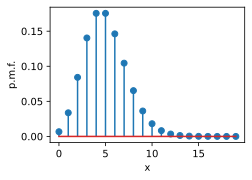

In [10]:
from math import factorial
lam = 5.0

xs = [i for i in range(20)]
pmf = np.array([np.exp(-lam)*lam**k/factorial(k) for k in xs])

d2l.plt.stem(xs,pmf, use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

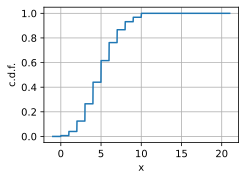

In [11]:
x = np.arange(-1, 21, 0.01)
cmf = np.cumsum(pmf)
F = lambda x: 0 if x < 0 else 1 if x > n else cmf[int(x)]

d2l.plot(x, np.array([F(y) for y in x.tolist()]), 'x', 'c.d.f.')

As we saw above, the means and variances are particularly concise.  If $X \sim \mathrm{Poisson}(\lambda)$, then:

* $\mu_X = \lambda$,
* $\sigma_X^2 = \lambda$.

This can be sampled in numpy as follows.

In [12]:
import numpy as np
np.random.poisson(lam,size=(10,10))

array([[ 2,  9,  2,  9,  6,  9,  7,  3,  8,  8],
       [ 3,  5,  5,  3,  3,  5,  5,  4,  5,  4],
       [ 3,  6,  4,  5,  3,  5,  2,  4,  7,  4],
       [ 5,  6,  4,  5,  6,  4,  2,  2,  8,  6],
       [ 6,  8,  7,  5,  4,  2, 11,  5,  5,  4],
       [ 8,  3,  8,  6,  5,  7, 13,  4,  3,  2],
       [ 7,  4,  3,  9,  7,  5,  1,  6,  3,  7],
       [ 4,  5,  3,  3,  4,  2,  1,  4,  3,  7],
       [ 6,  2,  1,  3,  3,  2,  5,  7,  5,  4],
       [ 4,  3,  4,  7,  7,  3,  3,  2,  9,  4]])

## Gaussian
Now Let us try a different, but related experiment.  Let us say we again are performing $n$ independent $\mathrm{Bernoulli}(p)$ measurements $X_i$.  The distribution of the sum of these is $X^{(n)} \sim \mathrm{Binomial}(n,p)$.  Rather than taking a limit as $n$ increases and $p$ decreases, Let us fix $p$, and then send $n \rightarrow \infty$.  In this case $\mu_{X^{(n)}} = np \rightarrow \infty$ and $\sigma_{X^{(n)}}^2 = np(1-p) \rightarrow \infty$, so there is no reason to think this limit should be well defined.

However, not all hope is lost!  Let us just make the mean and variance be well behaved by defining

$$
Y^{(n)} = \frac{X^{(n)} - \mu_{X^{(n)}}}{\sigma_{X^{(n)}}}.
$$

This can be seen to have mean zero and variance one, and so it is plausible to believe that it will converge to some limiting distribution.

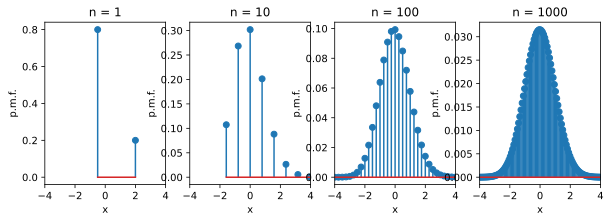

In [13]:
p = 0.2
ns = [1,10,100,1000]
d2l.plt.figure(figsize=(10,3))
for i in range(4) :
    n = ns[i]
    pmf = np.array([p**i*(1-p)**(n-i)*binom(n,i) for i in range(n+1)])
    d2l.plt.subplot(1, 4, i+1)
    d2l.plt.stem([(i-n*p)/np.sqrt(n*p*(1-p)) for i in range(n+1)],pmf,
                 use_line_collection=True)
    d2l.plt.xlim([-4,4])
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('p.m.f.')
    d2l.plt.title("n = {}".format(n))
d2l.plt.show()

One thing to note: compared to the Poisson case, we are now diving by the standard deviation which means that we are squeezing the possible outcomes into smaller and smaller areas.  This is an indication that our limit will no longer be discrete, but rather a continuous distribution.

A derivation of what occurs is well beyond the scope of this document, but the *central limit theorem* states that as $n \rightarrow \infty$, this will yield the Gaussian Distribution (or sometimes Normal distribution).  More explicitly, for any $a,b$:

$$
\lim_{n \rightarrow \infty} P(Y^{(n)} \in [a,b]) = P(\mathcal{N}(0,1) \in [a,b]),
$$

where we say a random variable is normally distributed with given mean $\mu$ and variance $\sigma^2$, written $X \sim \mathcal{N}(\mu,\sigma^2)$ if $X$ has density

$$
p_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$

Let us plot the probability density function and cumulative distribution function.

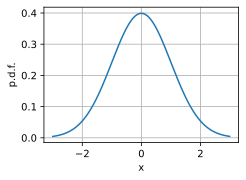

In [14]:
mu = 0; sigma = 1

x = np.arange(-3,3, 0.01)
p = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)**2)/(2*sigma**2))

d2l.plot(x, p, 'x', 'p.d.f.')

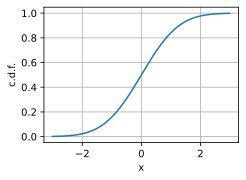

In [15]:
from math import erf
def phi(x):
    return (1.0 + erf((x-mu) / (sigma*np.sqrt(2)))) / 2.0

d2l.plot(x, np.array([phi(y) for y in x.tolist()]), 'x', 'c.d.f.')

Keen-eyed readers will recognize some of these terms.  Indeed, we encountered this integral we encountered in :numref:`sec_integral_calculus`.  Indeed we need exactly that computation to see that this $p_X(x)$ has total area one and is thus a valid density.

Our choice of working with coin flips made computations shorter, but nothing about that choice was fundamental.  Indeed, if we take any collection of independent identically distributed random variables $X_i$, and form

$$
X^{(N)} = \sum_{i=1}^N X_i.
$$

then

$$
\frac{X^{(N)} - \mu_{X^{(N)}}}{\sigma_{X^{(N)}}},
$$

will be approximately Gaussian.

This is the reason that the Gaussian is so central to probability, statistics, and machine learning.  Whenever we can say that something we measured is a sum of many small independent contributions, we can safely assume that the thing being measured will be close to Gaussian.

There are many more fascinating properties of Gaussians than we can get into at this point.  In particular, the Gaussian is what is known as a *maximum entropy distribution*.  We will get into entropy more deeply in :numref:`sec_information_theory`, however all we need to know at this point is that it is a measure of randomness.  In a rigorous mathematical sense, we can think of the Gaussian as the *most* random choice of random variable with fixed mean and variance.  Thus, if we know that our random variable has some mean and variance, the Gaussian is in a sense the most conservative choice of distribution we can make.

To close the section, Let us recall that if $X \sim \mathcal{N}(\mu,\sigma^2)$, then:

* $\mu_X = \mu$,
* $\sigma_X^2 = \sigma^2$.

We can sample from the Gaussian (or normal) using numpy.

In [16]:
np.random.normal(mu,sigma,size=(10,10))

array([[-0.26076036, -0.44591574,  0.21402145,  0.2311336 ,  0.25059263,
         0.54595986,  0.39673599,  0.62474854,  0.68465759, -0.72594635],
       [ 0.96478026, -2.26144969,  0.12180839,  1.01074615, -0.90749055,
         0.80385906, -1.00239212,  0.38697914,  0.99251598,  0.45906317],
       [-0.67691274,  0.42681849, -1.65333406, -1.02994468,  0.51138733,
         0.56969409, -0.21547047,  0.51968974,  1.87699524, -0.25738577],
       [ 0.55357821,  0.60427416, -0.64391825, -2.19581746, -1.06981772,
         0.7635911 , -2.16650435, -1.64572339,  1.08716319, -0.6475987 ],
       [ 0.06988932,  2.09255535,  0.03993319,  1.88559337, -0.8307433 ,
        -0.42446484,  0.02396786,  0.53666812, -1.93366733, -1.02434494],
       [ 1.43288837,  0.4061746 , -1.35728492, -0.57166594, -0.25681145,
         0.37676745, -1.3508536 ,  1.26834093, -0.74689269,  0.72229734],
       [ 1.63318225, -0.96763068,  0.44390932, -0.72928544, -0.08863893,
         1.42131519,  0.22980583, -0.55942535

## Summary
* Bernoulli random variables can be used to model events with a yes/no outcome.
* Discrete uniform distributions model selections from a finite set of possibilites.
* Continuous uniform distributions select from an interval.
* Binomial distributions model a series of Bernoulli random variables, and count the number of successes.
* Poisson random variables model the arrival of rare events.
* Gaussian random variables model the results of adding a large number of independent random variables together.

## Exercises

1. What is the standard deviation of a random variable that is the difference $X-Y$ of two indepent binomial random variables $X,Y \sim \mathrm{Binomial}(16,1/2)$.
2. If we take a Poisson random variable $X \sim \mathrm{Poisson}(\lambda)$ and consider $(X - \lambda)/\sqrt{\lambda}$ as $\lambda \rightarrow \infty$, we can show that this becomes approximately Gaussian.  Why does this make sense?
3. What is the probability mass function for a sum of two discrete uniform random variables on $n$ elements?